# Motor Vehicle Deaths in the USA

This notebook shows how to obtain motor vehicle deaths and number of miles traveled in the USA. A rate is calculated and then the information is graphed.

## Sources

### Car accident deaths

Both CDC and NHTSA have this data. NHTSA shows about 2-3k less deaths. CDC is used it has monthly data.

* CDC Motor vehicle deaths 2014-19 - https://data.cdc.gov/NCHS/Monthly-Counts-of-Deaths-by-Select-Causes-2014-201/bxq8-mugm
* CDC Motor vehicle deaths 2020-21 - https://data.cdc.gov/NCHS/Monthly-Provisional-Counts-of-Deaths-by-Select-Cau/9dzk-mvmi
* NHTSA
    * 2017 https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812603
    
### Miles traveled

[Office of Highway Policy Information](https://www.fhwa.dot.gov/policyinformation/travel_monitoring/tvt.cfm) - they provide travel each month measured in millions of miles in excel workbooks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
pd.set_option('display.max_columns', None)
plt.style.use('dashboard.mplstyle')
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

### Get car accident deaths

In [2]:
url_2014_2019_deaths = 'https://data.cdc.gov/resource/bxq8-mugm.json'
url_2020_2021_deaths = 'https://data.cdc.gov/resource/9dzk-mvmi.json'

df_car_deaths = pd.read_json(url_2014_2019_deaths).pivot(index='month', 
                                                         columns='year', values='motor_vehicle_accidents')
df_car_deaths_20 = pd.read_json(url_2020_2021_deaths).pivot(index='month', 
                                                            columns='year', values='motor_vehicle_accidents')
df_car_deaths[2020] = df_car_deaths_20[2020]
df_car_deaths = df_car_deaths.rename_axis(columns=None)
df_car_deaths.index = MONTHS
df_car_deaths

,2014,2015,2016,2017,2018,2019,2020
Jan,2572,2754,2734,3034,3010,2948,2910.0
Feb,2248,2350,2820,2748,2734,2535,2911.0
Mar,2589,2764,3105,3164,3015,2956,2871.0
Apr,2720,2830,3152,3238,2979,3079,2566.0
May,3038,3339,3481,3416,3443,3417,3365.0
Jun,3084,3222,3542,3492,3514,3449,4022.0
Jul,3227,3530,3582,3730,3552,3527,4097.0
Aug,3277,3642,3600,3409,3490,3645,4218.0
Sep,3069,3372,3612,3572,3579,3543,4068.0
Oct,3304,3550,3834,3629,3657,3506,4184.0


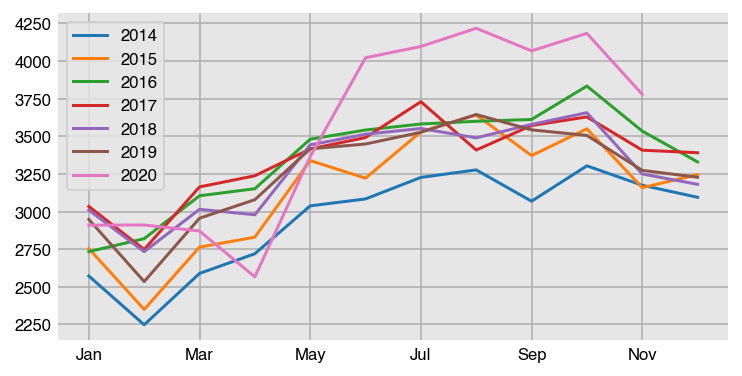

In [3]:
ax = df_car_deaths.plot()

## Get miles traveled from US Department of Transportation

Download excel notebooks found here: [Office of Highway Policy Information](https://www.fhwa.dot.gov/policyinformation/travel_monitoring/tvt.cfm)

In [4]:
dfs = []
for month in MONTHS:
    mon = month.lower()
    url =f'https://www.fhwa.dot.gov/policyinformation/travel_monitoring/20{mon}tvt/20{mon}tvt.xls'
    dft = pd.read_excel(url, sheet_name=1, header=23)
    dfs.append(dft.loc[:, 'Year':])

df_drive_month = pd.concat((df.iloc[:, :2].set_index('Year') for df in dfs[-12:]), axis=1).dropna().astype('int')
df_drive_month.columns = MONTHS
df_drive_month.index = df_drive_month.index.astype('int')
df_miles = df_drive_month.T
df_miles

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Jan,193838,183465,190126,196870,193581,203442,209685,215215,218534,222450,224072,233282,233621,232920,225529,220839,223790,227527,229419,226413,233498,239679,242600,244736,248395,253656
Feb,171053,176562,183950,187167,191485,199261,200876,208237,203677,213709,219970,220711,219232,221336,217643,210635,213463,218196,215803,213949,217220,223011,225644,227759,226782,231664
Mar,201227,204172,211952,214222,220763,232490,232587,236070,236679,251403,253182,256623,259638,252343,249741,254238,253124,256166,253026,253424,258017,265147,268343,270705,271568,220950
Apr,198213,205253,211290,217921,220996,227698,232513,237226,239415,250968,250860,250644,252595,252088,251374,253936,249578,249394,252064,256736,262817,269653,272864,275127,281566,169567
May,212586,218676,226082,227899,230786,242501,245357,251746,253244,257235,262678,263370,267574,261466,258276,256927,254083,260774,263406,266237,270839,277972,281264,283713,286135,213197
Jun,211370,215551,222254,228733,235970,242963,243498,247868,252145,257383,263816,263782,265374,257484,258395,260083,258350,260376,259980,263459,270574,276991,280290,282648,281203,244675
Jul,217188,225109,236713,239944,243116,245140,250363,256392,262105,265969,267025,263421,267106,261600,264472,265315,260175,260244,263946,270053,278372,285160,288566,290989,295577,262419
Aug,219216,229050,233496,237143,241503,247832,253274,258666,260687,262836,265323,265206,271225,260609,260297,263837,260526,264379,268061,268831,272209,279213,282558,284989,286531,251265
Sep,203866,207604,213547,219461,224306,227899,226312,233625,237451,243515,242240,245605,245965,239607,241970,244682,242062,238867,242536,247688,255090,262039,265212,267434,271691,248277
Oct,206745,215654,221219,228523,233631,236491,241050,245556,254048,254496,251419,257939,261423,255848,252209,256395,251906,253574,258748,265144,268469,275610,278888,281382,284036,259029


### Graph miles driven

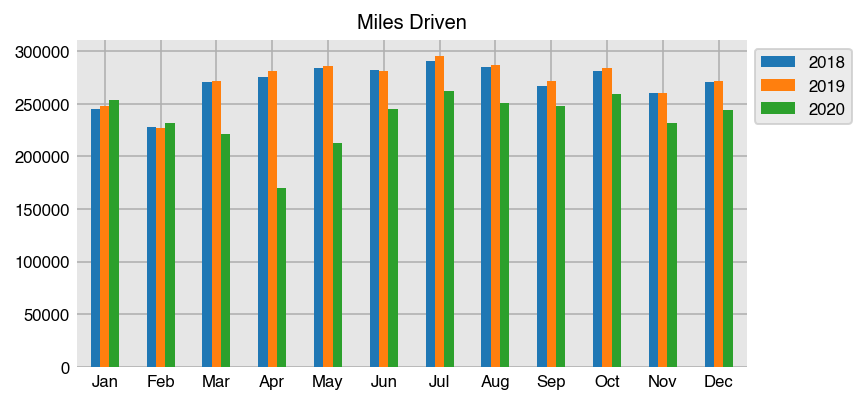

In [5]:
ax = df_miles.loc[:, 2018:].plot(kind='bar', rot=0)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Miles Driven', size=10);

### Calculate Death rates

Deaths per 100 million miles traveled

In [8]:
df_rate = (df_car_deaths / df_miles).dropna(axis=1, how='all') * 100
df_rate = df_rate.round(3)
df_rate

,2014,2015,2016,2017,2018,2019,2020
Jan,1.136,1.179,1.141,1.251,1.230,1.187,1.147
Feb,1.051,1.082,1.265,1.218,1.200,1.118,1.257
Mar,1.022,1.071,1.171,1.179,1.114,1.088,1.299
Apr,1.059,1.077,1.169,1.187,1.083,1.094,1.513
May,1.141,1.233,1.252,1.215,1.214,1.194,1.578
Jun,1.171,1.191,1.279,1.246,1.243,1.227,1.644
Jul,1.195,1.268,1.256,1.293,1.221,1.193,1.561
Aug,1.219,1.338,1.289,1.206,1.225,1.272,1.679
Sep,1.239,1.322,1.378,1.347,1.338,1.304,1.638
Oct,1.246,1.322,1.391,1.301,1.300,1.234,1.615


### Plot death rate

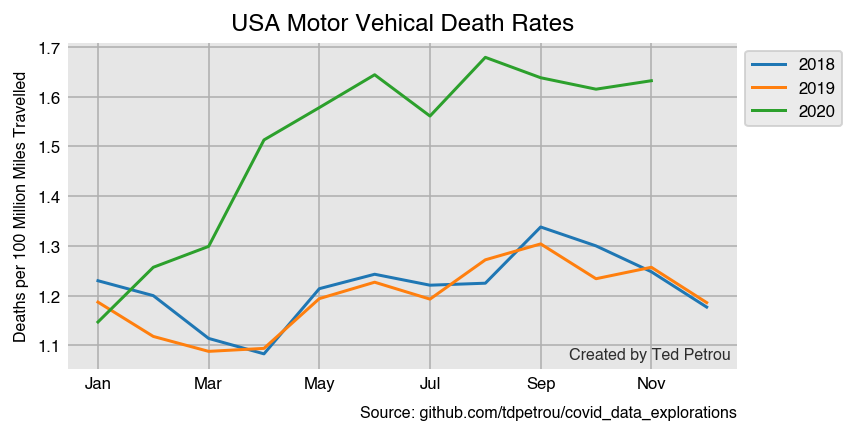

In [9]:
ax = df_rate.loc[:, 2018:].plot(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('USA Motor Vehical Death Rates')
ax.set_ylabel('Deaths per 100 Million Miles Travelled', size=8)
ax.text(1, -.15, 'Source: github.com/tdpetrou/covid_data_explorations', 
        ha='right', transform=ax.transAxes, size=8)
ax.text(.99, .03, "Created by Ted Petrou", ha='right', transform=ax.transAxes, size=8, alpha=.8);

### Deaths and Death rate in same figure

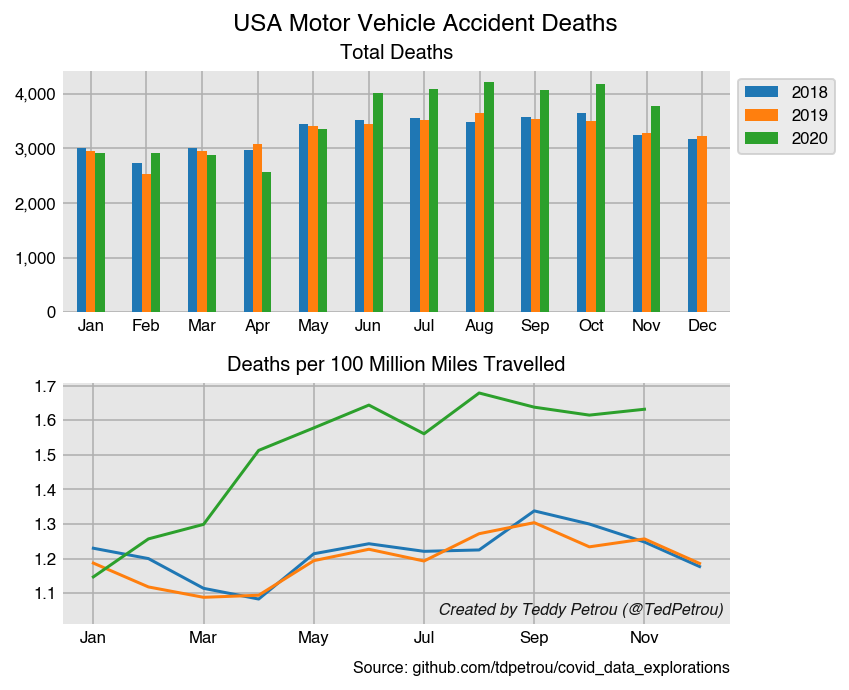

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), tight_layout=True)
df_car_deaths.loc[:, 2018:].plot(kind='bar', rot=0, ax=ax1)
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig.suptitle('USA Motor Vehicle Accident Deaths',  y=0.95)
ax1.set_title('Total Deaths', size=10)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
df_rate.loc[:, 2018:].plot(rot=0, ax=ax2, legend=False)
ax2.set_title('Deaths per 100 Million Miles Travelled', size=10)
ax2.set_ylim(ymin=1.01);
ax2.text(.99, .04, "Created by Teddy Petrou (@TedPetrou)", ha='right', style='italic', 
         transform=ax2.transAxes, size=8, alpha=0.9);
ax2.text(1, -.2, 'Source: github.com/tdpetrou/covid_data_explorations', 
         ha='right', transform=ax2.transAxes, size=8);